# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [2]:
import pandas as pd
import numpy as np

In [58]:
path = pd.read_csv("../project_data/project_transactions.csv")

In [63]:
# read in transactions, product, and hh_demographic tables
# Read in the only columns household_key, BASKET_ID, DAY, PRODUCT_ID, QUANTITY, and SALES_VALUE
# Convert DAY, QUANTITY, and PRODUCT_ID to the smallest appropriate integer types

#keep
selected_cols = ["household_key","BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]
types = {"DAY":"int16", "QUANTITY":"int32", "PRODUCT_ID":"int32"}

#path = pd.read_csv("../project_data/project_transactions.csv")

transactions = pd.read_csv("../project_data/project_transactions.csv", 
                           usecols=selected_cols, 
                           dtype=types)                       

In [64]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60


In [65]:
transactions.dtypes                

household_key      int64
BASKET_ID          int64
DAY                int16
PRODUCT_ID         int32
QUANTITY           int32
SALES_VALUE      float64
dtype: object

In [66]:
transactions.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            int16  
 3   PRODUCT_ID     int32  
 4   QUANTITY       int32  
 5   SALES_VALUE    float64
dtypes: float64(1), int16(1), int32(2), int64(2)
memory usage: 69.6 MB


In [68]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [69]:
products = pd.read_csv("../project_data/product.csv")
demographic = pd.read_csv("../project_data/hh_demographic.csv")

In [70]:
# Use the following snippet to create a Date Column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [71]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


In [72]:
transactions.tail()


,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
2146306,1598,42305362535,92130,1,0.99,2017-12-11
2146307,1598,42305362535,114102,1,8.89,2017-12-11
2146308,1598,42305362535,133449,1,6.99,2017-12-11
2146309,1598,42305362535,6923644,1,4.50,2017-12-11
2146310,1598,42305362535,14055192,1,6.99,2017-12-11


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [73]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


<Axes: xlabel='date'>

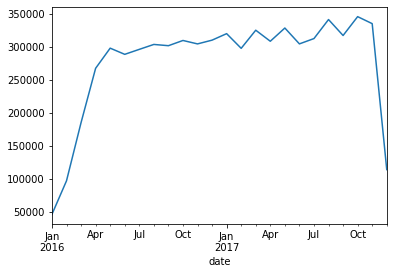

In [74]:
# Plot the sum of sales by month. Are sales growing over time?

(transactions.set_index("date")
.loc[:,"SALES_VALUE"]
.resample("M")
.sum()
.plot())



#groupby(transactions["date"].dt.month)[["SALES_VALUE"]].sum().plot()

<Axes: xlabel='date'>

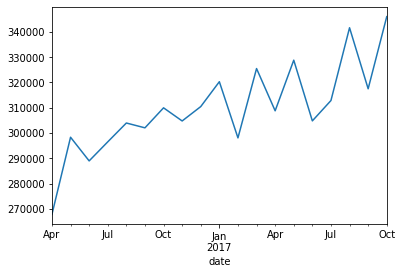

In [75]:
# plot the same series after filtering down to dates April 2016 and October 2017.

(transactions.set_index("date")
.loc["2016-04-01":"2017-10-31","SALES_VALUE"]
.resample("M")
.sum()
.plot())

<Axes: xlabel='date'>

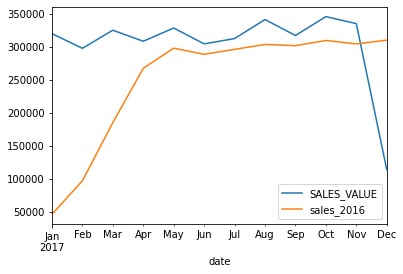

In [80]:
# plot the sum of monthly sales in 2016 vs the monthly sales 2017.

(transactions.set_index("date")
.loc[:,["SALES_VALUE"]]
.resample("M")
.sum()
.assign(sales_2016 = lambda x: x["SALES_VALUE"].shift(12))
.loc["2017"]
.plot())

<Axes: xlabel='date'>

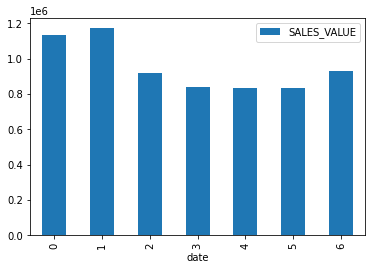

In [87]:
# plot total sales by day of week

transactions.groupby([transactions["date"].dt.dayofweek])[["SALES_VALUE"]].sum().plot.bar()

#transactions.groupby([transactions["date"].dt.dayofweek]).agg({"SALES_VALUE":"sum"}).plot.bar()

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [88]:
demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [89]:
demographic.dtypes

AGE_DESC               object
MARITAL_STATUS_CODE    object
INCOME_DESC            object
HOMEOWNER_DESC         object
HH_COMP_DESC           object
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
household_key           int64
dtype: object

In [90]:
#Read in the hh_demographic.csv file, but only the columns AGE_DESC, INCOME_DESC, household_key, and HH_COMP_DESC. 
#Convert the appropriate columns to the category dtype.

selected_cols2 = ["AGE_DESC","INCOME_DESC", "household_key", "HH_COMP_DESC"]
types2 = {"AGE_DESC":"category", "INCOME_DESC":"category", "household_key":"int64", "HH_COMP_DESC":"category"}

demographic = pd.read_csv("../project_data/hh_demographic.csv",
                         usecols=selected_cols2, 
                         dtype=types2)

In [92]:
demographic.dtypes

AGE_DESC         category
INCOME_DESC      category
HH_COMP_DESC     category
household_key       int64
dtype: object

In [128]:
demographic.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [129]:
demographic.info(memory_usage ="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.9 KB


In [95]:
# Create a total sales by household dataframe

# group the transactions table by household_id, and calculate the sum of SALES VALUE by household.

household_sales = (transactions.groupby("household_key").agg({"SALES_VALUE":"sum"}))

household_sales.head()

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06


In [98]:
# join the demographics DataFrame to the aggregated transactions table. 
# make sure not to include rows from transactions that don't match

demo_trans = household_sales.merge(
             demographic, 
             how="inner", 
             left_on = "household_key", 
             right_on = "household_key"
)

demo_trans.head()

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female


<Axes: xlabel='AGE_DESC'>

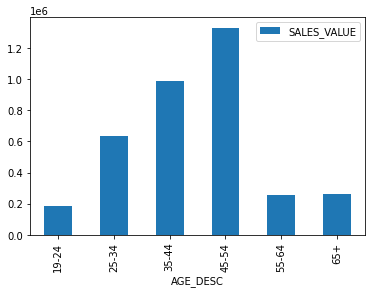

In [101]:
# Plot the sum of sales by age_desc -- sum of sales by age group

demo_trans.groupby("AGE_DESC").agg({"SALES_VALUE":"sum"}).plot.bar()

<Axes: xlabel='INCOME_DESC'>

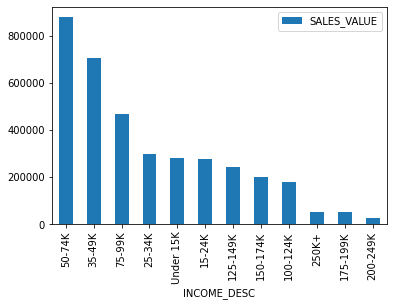

In [107]:
# Plot the sum of sales by income_desc  -- sum of sales by income desc

demo_trans.groupby(["INCOME_DESC"]).agg({"SALES_VALUE":"sum"}).sort_values("SALES_VALUE", ascending = False).plot.bar()

In [114]:
# create a pivot table of the mean household sales by AGE_DESC and HH_COMP_DESC. 
# Which of our demographics have the highest average sales

(demo_trans.pivot_table(
    index= ["AGE_DESC"], 
    columns=["HH_COMP_DESC"],
    values="SALES_VALUE",
    aggfunc="mean",
    margins = True
).style.background_gradient(cmap="RdYlGn", axis=None))



HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [116]:
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [117]:
products.dtypes

PRODUCT_ID               int64
MANUFACTURER             int64
DEPARTMENT              object
BRAND                   object
COMMODITY_DESC          object
SUB_COMMODITY_DESC      object
CURR_SIZE_OF_PRODUCT    object
dtype: object

In [118]:
#Read in the product csv file.
#Only read in product_id and department from product (consider converting columns).

selected_cols3 = ["PRODUCT_ID","DEPARTMENT"]
types3 = {"PRODUCT_ID":"int64", "DEPARTMENT":"category"}

products = pd.read_csv("../project_data/product.csv",
                      usecols=selected_cols3, 
                      dtype=types3)

In [119]:
products.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [120]:
products.dtypes

PRODUCT_ID       int64
DEPARTMENT    category
dtype: object

In [122]:
#Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables

trans_prod_demo = (transactions.merge(
    demographic,
    how="inner",
    left_on="household_key",
    right_on = "household_key"
     ).merge(products,
             how="inner",
    left_on="PRODUCT_ID",
    right_on = "PRODUCT_ID"
))

trans_prod_demo.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,304,27950201718,842930,1,1.67,2016-03-21,25-34,50-74K,2 Adults No Kids,GROCERY
2,575,34186568032,842930,1,1.67,2017-04-29,35-44,50-74K,Single Female,GROCERY
3,77,28023861855,842930,3,5.00,2016-03-27,35-44,100-124K,2 Adults Kids,GROCERY
4,454,42136182098,842930,1,1.67,2017-11-29,55-64,35-49K,Single Male,GROCERY


In [123]:
trans_prod_demo.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   PRODUCT_ID     1161575 non-null  int32         
 3   QUANTITY       1161575 non-null  int32         
 4   SALES_VALUE    1161575 non-null  float64       
 5   date           1161575 non-null  datetime64[ns]
 6   AGE_DESC       1161575 non-null  category      
 7   INCOME_DESC    1161575 non-null  category      
 8   HH_COMP_DESC   1161575 non-null  category      
 9   DEPARTMENT     1161575 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int32(2), int64(2)
memory usage: 57.6 MB


In [127]:
# pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. 
# Which category does our youngest demographic perform well in? SPIRITS

(trans_prod_demo.pivot_table(
    index= ["DEPARTMENT"], 
    columns=["AGE_DESC"],
    values="SALES_VALUE",
    aggfunc="sum",
).style.background_gradient(cmap="RdYlGn", axis=1))

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [130]:
#export your pivot table to an excel file. Make sure to provide a sheet name 

(trans_prod_demo.pivot_table(
    index= ["DEPARTMENT"], 
    columns=["AGE_DESC"],
    values="SALES_VALUE",
    aggfunc="sum",
).style.background_gradient(cmap="RdYlGn", axis=1)
 .to_excel("demographic_category_sales.xlsx", sheet_name = "sales_pivot"))